# Temporal Analysis

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis'

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

In [5]:
df = pd.read_csv(os.path.join(current_dir, 'filtered_accident_data_set.csv'))
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Vehicle_Type
0,200720D003001,Slight,02-01-2019,52.513668,Darkness - lights lit,Birmingham,-1.901975,1,2,Wet or damp,Dual carriageway,Urban,Car
1,200720D003101,Slight,02-01-2019,52.502396,Daylight,Birmingham,-1.867086,1,2,Wet or damp,Single carriageway,Urban,Car
2,200720D003802,Serious,03-01-2019,52.563201,Daylight,Birmingham,-1.822793,1,1,Dry,Single carriageway,Urban,Car
3,200720D005801,Slight,02-01-2019,52.493431,Daylight,Birmingham,-1.818507,1,2,Wet or damp,Dual carriageway,Urban,Car
4,200720D005901,Slight,05-01-2019,52.510805,Darkness - lights lit,Birmingham,-1.834202,1,3,Dry,Dual carriageway,Urban,Car


In [6]:
# Extract year from 'Accident Date' column
df['Year'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y').dt.year
print(df['Year'].dtype)

int32


In [7]:
accidents_per_year = df['Year'].value_counts().sort_index()

fig = px.line(accidents_per_year, x=accidents_per_year.index, y=accidents_per_year.values, 
              labels={'x': 'Year', 'y': 'Number of Accidents'}, 
              title='Number of Accidents Over the Years')

# Set x-axis type to category
fig.update_layout(xaxis_type='category')

fig.show()

The graph above shows the trend of road accidents from 2019 to 2022. Here's what we can see:

**Overall Trend**: The number of accidents has been decreasing steadily over the years.
    - In 2019, the number of accidents was the highest at 9027.
    - By 2022, the number of accidents dropped to 6522, indicating a significant decline.
    - The sharpest drop occurred between 2021 and 2022, where accidents reduced .

**Possible Factors**:
    - The decline could be attributed to improved road safety measures, changes in traffic patterns, or external factors like the COVID-19 pandemic, which reduced travel in 2020 and subsequent years.

The graph effectively highlights the reduction in accidents over time, which could be a positive indicator of improved road safety or reduced traffic activity.

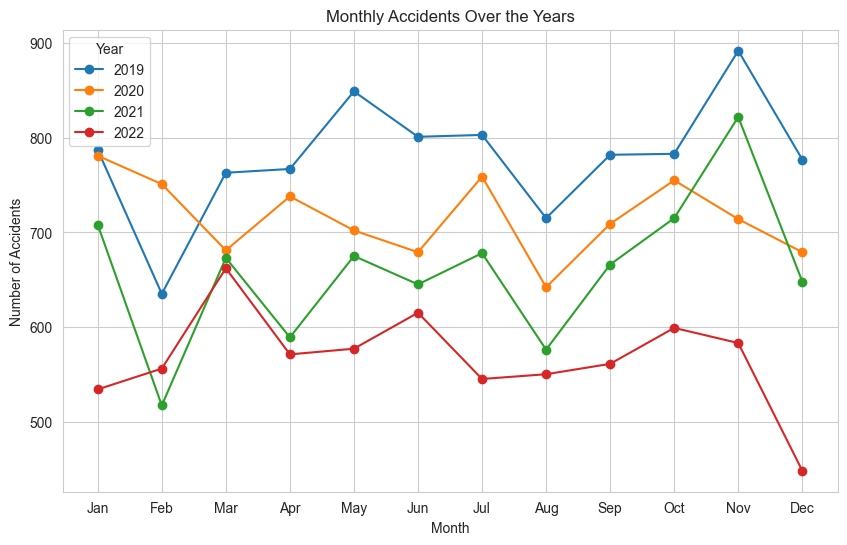

In [8]:
# Extract month from 'Accident Date' column
df['Month'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y').dt.month

# Group by Year and Month to count accidents
accidents_per_month = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Pivot the data for plotting
accidents_pivot = accidents_per_month.pivot(index='Month', columns='Year', values='Count')

# Plot the data
accidents_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Accidents Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

The graph above shows the number of accidents for each month over their repective year.

**Overall Trend** There doesn't look to be a repeating pattern overall between all 4 years. 2019 and 2021 have similar patterns, both peaking in November and having similar peaks and troughs througout, but 2020 and 2022 differ from the rest, with none of them showing any repeating patterns.

In [9]:
from scipy.stats import kendalltau

# Extract the number of accidents over 48 months
monthly_accidents = accidents_per_month['Count'].values

# Perform the Mann-Kendall test
tau, p_value = kendalltau(range(len(monthly_accidents)), monthly_accidents)

print(f"Kendall's tau: {tau}")
print(f"P-value: {p_value}")

Kendall's tau: -0.5944989030637912
P-value: 2.5934525352619034e-09


The Kendall's tau value of -0.5998 and the extremely low P-value indicate that there is a statistically significant and relatively strong downward trend in the number of accidents over the 48 months.

We can see clearly this is the case from the year on year accident counts. This result indicates that something has happened over those 48 months to reduce the number of accidents. Further analysis would be needed to determine what caused that reduction.

---

# Hypothesis 1

**1) Accidents occur more frequently in the Winter season**

To check this we shall add up the number of counts for each month and group them by season. In the UK, the December months would be classified as Dec-Feb.

In [10]:
# Define seasons based on months
def label_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the season labeling
accidents_per_month['Season'] = accidents_per_month['Month'].apply(label_season)

accidents_per_month.head()

,Year,Month,Count,Season
0,2019,1,787,Winter
1,2019,2,635,Winter
2,2019,3,763,Spring
3,2019,4,767,Spring
4,2019,5,849,Spring


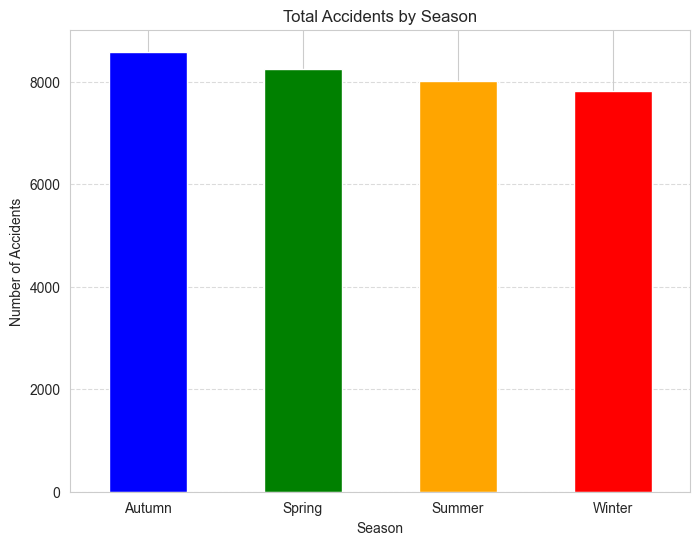

In [11]:
# Group by season and sum the counts
seasonal_totals = accidents_per_month.groupby('Season')['Count'].sum()

# Plot the bar chart
seasonal_totals.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], figsize=(8, 6))
plt.title('Total Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Surprisingly, we see that the number of accidents in Winter is actually the lowest in our data. The hypothesis was derived from the speculation that, because daylight hours are shorter and weather conditions generally thought to be less ideal for driving are more prevalent, the accident rate would be higher. However, since our data only spans 4 years—meaning we only have 4 instances of each season—it is not enough to make statistically robust conclusions about the relationship between seasons and the number of accidents. A larger dataset spanning more years would be needed to draw more reliable insights and validate the hypothesis.